In [186]:
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

from load_data import load_data

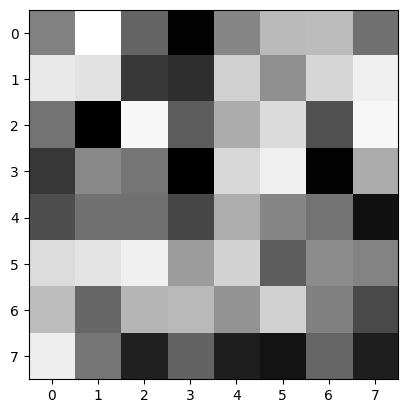

In [19]:
def random_dots(N=32):
    return np.random.random((N,N))

sal_map = random_dots(8)
plt.imshow(sal_map, cmap='gray')

In [303]:
class choose_point():

    def __init__(self, _WIDTH, _fov=24):
        """
        _WIDTH: Width/Height of saliency map
        _fov: Field of view
        """

        self.WIDTH = _WIDTH
        self.fov = _fov
        
        if self.WIDTH % 2 != 0:
            self.MIDPOINT = self.WIDTH // 2
        else:
            self.MIDPOINT = self.WIDTH // 2 + .5 - 1

        self.eccentricity_map = np.fromfunction(lambda i, j: np.sqrt((i-self.MIDPOINT)**2 + (j-self.MIDPOINT)**2), (_WIDTH, _WIDTH))
        self.eccentricity_map *= _fov/(_WIDTH-1)

        #count how often eccentricity value accures is eccentrcicity map
        uniques, counts = np.unique(self.eccentricity_map, return_counts=True)

        self.eccentricity_frequencies = np.zeros((_WIDTH, _WIDTH))
        for i in range(_WIDTH):
            for j in range(_WIDTH):
                value = self.eccentricity_map[i,j]
                index = np.where(uniques == value)[0]
                self.eccentricity_frequencies[i,j] =  counts[index][0]


        #load data 
        xdata, (mean_ch, error_ch), (mean_pa, error_pa), (mean_schütt, error_schütt) = load_data(hist_range=(0,uniques[-1]+1), n_bins=20)


        self.data_mask = np.zeros((_WIDTH, _WIDTH))
        for i in range(_WIDTH):
            for j in range(_WIDTH):
                ecc = self.eccentricity_map[i,j]
                index = np.digitize(ecc, xdata)
                self.data_mask[i,j] = mean_ch[index]


    def sacc_goal(self, sal_map):
        sal_map = sal_map * self.data_mask / self.eccentricity_frequencies
        sal_map /= np.sum(sal_map)

        index_list = np.arange(self.WIDTH**2)
        choice = np.random.choice(index_list, p=sal_map.flatten())

        goal_index = np.divmod(self.WIDTH-1, choice)

        print(sal_map.flatten()[choice])
        print(sal_map[goal_index])

        return goal_index

    

a = choose_point(8, 24)

In [ ]:



f,ax= plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(a.eccentricity_map)
ax[0].grid()
ax[0].set_xticks(np.arange(a.WIDTH))
ax[0].set_yticks(np.arange(a.WIDTH))
for (j,i),label in np.ndenumerate(a.eccentricity_map):
    ax[0].text(i,j,np.round(label,2),ha='center',va='center', color='white')

im = ax[1].imshow(a.eccentricity_frequencies)
ax[1].set_xticks(np.arange(a.WIDTH))
ax[1].set_yticks(np.arange(a.WIDTH))
ax[1].grid()
for (j,i),label in np.ndenumerate(a.eccentricity_frequencies):
    ax[1].text(i,j,label,ha='center',va='center', color='white')

im = ax[2].imshow(a.data_mask)
ax[2].set_xticks(np.arange(a.WIDTH))
ax[2].set_yticks(np.arange(a.WIDTH))
ax[2].grid()
for (j,i),label in np.ndenumerate(a.data_mask):
    ax[2].text(i,j,int(label*100),ha='center',va='center', color='white')


In [245]:
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [248]:
w = [0]*8 + [1]

[0, 0, 0, 0, 0, 0, 0, 0, 1]

In [247]:
x.flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [252]:
np.random.choice(x.flatten(), p=w)

8

In [256]:
x[np.divmod(7,3)]

7

In [304]:
x = np.arange(8*8).reshape((8,8))
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [305]:
a.sacc_goal(x)

0.05763730538608536
0.0025413175889992335


(0, 7)